A few example images:


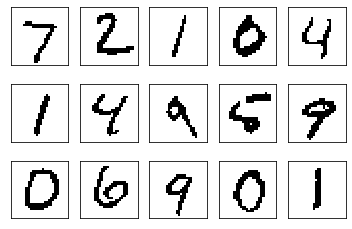

Average iamges


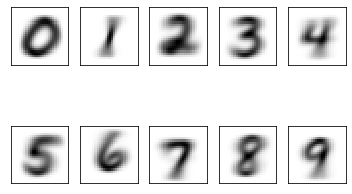

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from matplotlib import pyplot as plt
import cv2

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## function to plot images in grid
def show_images(images, rows, cols):
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray_r)
        plt.xticks(())
        plt.yticks(())
    plt.show()


# The default image size is 28x28, but use line below to resize
#d = 28

#convert images to 0/1 and resize
#x_train_int = [np.round(1.0*cv2.resize(i, (d,d))/256) for i in x_train] 
#x_test_int = [np.round(1.0*cv2.resize(i, (d,d))/256) for i in x_test]

x_train_int = [np.round(1.0*i/256) for i in x_train] 
x_test_int = [np.round(1.0*i/256) for i in x_test]

## Uncomment belos to see a few images
print('A few example images:')
show_images(x_test_int, 3, 5)

pixel_sums = np.zeros((10,d,d))+1  # add 1 to avoid divide by zero, called Laplace smoothing
total_count = np.zeros((10))+1  #generate a list for counts of occurances, add 1 as well

for i, y in enumerate(y_train):
    pixel_sums[y] = pixel_sums[y]+x_train_int[i] #add ith image to the running sum for its class y
    total_count[y] = total_count[y]+1 #increment counter for that class

## Plot the average images
print('Average iamges')
show_images(np.array([pixel_sums[i]/total_count[i] for i in range(10)]), 2, 5)

#for i, im in enumerate(pixel_sums):
#    plt.imshow(im/total_count[i], cmap='gray_r')
#    plt.show()



In [11]:
#### Testing ########

errors = 0
for j, x in enumerate(x_test_int):
    nb_llr = [0]*10 #store the naive bayes log likelihood ratio in a list 
    for i in range(10):    
        nb_llr[i] = np.sum(x*np.log(1.0*pixel_sums[i]/total_count[i]))+\
            np.sum((1-x)*np.log(1-1.0*pixel_sums[i]/total_count[i]))

    #predict the image by looking at the largest value in list
    prediction = np.argmax(nb_llr)
    if prediction != y_test[j]:
        errors = errors+1
    
print('Error rate: ', errors/len(x_test_int))

Error rate:  0.1565
